In [3]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


(X_train,y_train),(X_test,y_test)=mnist.load_data()



In [2]:
print('학습셋 이미지 수: %d개'%(X_train.shape[0]))
print('테스트셋 이미지 수: %d개'%(X_test.shape[0]))

학습셋 이미지 수: 60000개
테스트셋 이미지 수: 10000개


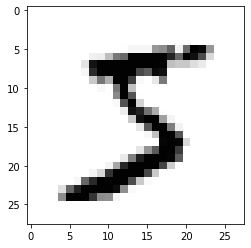

In [5]:
plt.imshow(X_train[0],cmap='Greys')
plt.show()

In [8]:
X_train.shape

(60000, 28, 28)

In [7]:
import sys
for x in X_train[0]:
  for i in x:
    sys.stdout.write('%-3s'%i)
  sys.stdout.write('\n')

0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  0  3  18 18 18 12613617526 1662552471270  0  0  0  
0  0  0  0  0  0  0  0  30 36 94 15417025325325325325322517225324219564 0  0  0  0  
0  0  0  0  0  0  0  49 23825325325325325325325325325193 82 82 56 39 0  0  0  0  0  
0  0  0  0  0  0  0  18 2192532532532532531981822472410  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  80 15610725325320511 0  43 1540  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  14 1  15425390 0  0  0  0  0  0  0  0  0  0  0  0  0  0  
0  0  0  0  0  0  0  0  0  0  0  1392531902  0  0  0  0  0  0  0 

In [9]:
X_train=X_train.reshape(X_train.shape[0],784)
X_train=X_train.astype('float64')
X_train=X_train/255

X_test=X_test.reshape(X_test.shape[0],784).astype('float64')/255


In [10]:
print('class : %d'%(y_train[0]))

class : 5


In [11]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)
print(y_train[0])

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [14]:
model = Sequential()
model.add(Dense(512,input_dim=784,activation='relu'))
model.add(Dense(10,activation='softmax'))

model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])
modelpath='./data/MNIST_MLP.hdf5'
early_stopping_callback=EarlyStopping(monitor='val_loss',patience=10)
checkpointer=ModelCheckpoint(filepath=modelpath,verbose=1,monitor='val_loss',save_best_only=True)
history=model.fit(X_train,y_train,epochs=30,batch_size=200,verbose=0,validation_split=0.25,callbacks=[early_stopping_callback,checkpointer])
print('\n Test Accuracy:%.4f'% (model.evaluate(X_test,y_test)[1]))


Epoch 1: val_loss improved from inf to 0.18329, saving model to ./data/MNIST_MLP.hdf5

Epoch 2: val_loss improved from 0.18329 to 0.13602, saving model to ./data/MNIST_MLP.hdf5

Epoch 3: val_loss improved from 0.13602 to 0.11275, saving model to ./data/MNIST_MLP.hdf5

Epoch 4: val_loss improved from 0.11275 to 0.09853, saving model to ./data/MNIST_MLP.hdf5

Epoch 5: val_loss improved from 0.09853 to 0.09402, saving model to ./data/MNIST_MLP.hdf5

Epoch 6: val_loss did not improve from 0.09402

Epoch 7: val_loss improved from 0.09402 to 0.08352, saving model to ./data/MNIST_MLP.hdf5

Epoch 8: val_loss did not improve from 0.08352

Epoch 9: val_loss improved from 0.08352 to 0.08151, saving model to ./data/MNIST_MLP.hdf5

Epoch 10: val_loss improved from 0.08151 to 0.07989, saving model to ./data/MNIST_MLP.hdf5

Epoch 11: val_loss did not improve from 0.07989

Epoch 12: val_loss improved from 0.07989 to 0.07954, saving model to ./data/MNIST_MLP.hdf5

Epoch 13: val_loss did not improve fr

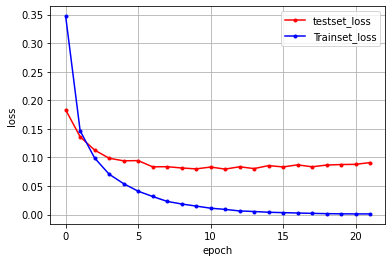

In [15]:
y_vloss=history.history['val_loss']
y_loss=history.history['loss']

x_len=np.arange(len(y_loss))
plt.plot(x_len,y_vloss,marker='.',c='red',label='testset_loss')
plt.plot(x_len,y_loss,marker='.',c='blue',label='Trainset_loss')

plt.legend(loc='upper right')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [ ]:
model.add(Conv2D(32,kernel_size=3,3),input_shape=(28,28,1),acrivation='relu')
model.add(Conv2D(,64,(3,3)),activation='relu')










